In [1]:
import numpy as np
import os
import pickle
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from sklearn.preprocessing import StandardScaler
import pandas as pd

from utils import *

In [2]:
device = torch.device('cuda:0')

# Load data

In [3]:
result_dir = '../results/ids-dataset'
batch_size = 256

In [4]:
cicids17_bn, cicids18_bn, cicids17_m, cicids18_m = load_all_data(result_dir)

/home/saerom/.pyenv/versions/pytorch111/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/saerom/.pyenv/versions/pytorch111/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


{'Web Attack \x96 Brute Force': 0, 'Web Attack \x96 XSS': 0, 'Web Attack \x96 Sql Injection': 0, 'DDoS': 1, 'Bot': 2, 'DoS slowloris': 3, 'DoS Slowhttptest': 4, 'DoS Hulk': 5, 'DoS GoldenEye': 6, 'PortScan': 7, 'FTP-Patator': 8, 'SSH-Patator': 9}
drop Benign
drop Infiltration
drop Heartbleed
original instances:  1040360
drop intances:  751106
after drop:  289254
drop Benign
drop Infiltration
drop Heartbleed
original instances:  260090
drop intances:  187670
after drop:  72420


/home/saerom/.pyenv/versions/pytorch111/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


{'Brute Force -Web': 0, 'Brute Force -XSS': 0, 'SQL Injection': 0, 'DoS attacks-Hulk': 1, 'DoS attacks-GoldenEye': 2, 'DoS attacks-Slowloris': 3, 'Bot': 4, 'DDoS attacks-LOIC-HTTP': 5, 'DDOS attack-HOIC': 6, 'Infilteration': 7, 'FTP-BruteForce': 8, 'SSH-Bruteforce': 9}
drop Benign
drop DoS attacks-SlowHTTPTest
original instances:  5971201
drop intances:  5310540
after drop:  660661
drop Benign
drop DoS attacks-SlowHTTPTest
original instances:  1492801
drop intances:  1327411
after drop:  165390


/home/saerom/.pyenv/versions/pytorch111/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
n_features = cicids17_bn[0].shape[1]
num_class17 = len(np.unique(cicids17_m[1]))
num_class18 = len(np.unique(cicids18_m[1]))
n_hidden = 32

# Load scalers and models

In [6]:
clf_bn17 = BinaryNN(n_features, n_hidden)
clf_bn17.load_state_dict(torch.load(os.path.join(result_dir, "cicids17_bn_clf.pth"),map_location='cpu'))
clf_bn18 = BinaryNN(n_features, n_hidden)
clf_bn18.load_state_dict(torch.load(os.path.join(result_dir, "cicids18_bn_clf.pth"),map_location='cpu'))

clf_mul17 = MultNN(n_features, n_hidden, num_class17)
clf_mul17.load_state_dict(torch.load(os.path.join(result_dir, "cicids17_mul_clf.pth"),map_location='cpu'))
clf_mul17_LS = MultNN(n_features, n_hidden, num_class17)
clf_mul17_LS.load_state_dict(torch.load(os.path.join(result_dir, "cicids17_mul_clf_LS.pth"),map_location='cpu'))
clf_mul17_OE = MultNN(n_features, n_hidden, num_class17)
clf_mul17_OE.load_state_dict(torch.load(os.path.join(result_dir, "cicids17_mul_clf_OE.pth"),map_location='cpu'))

clf_mul18 = MultNN(n_features, n_hidden, num_class18)
clf_mul18.load_state_dict(torch.load(os.path.join(result_dir, "cicids18_mul_clf.pth"),map_location='cpu'))
clf_mul18_LS = MultNN(n_features, n_hidden, num_class18)
clf_mul18_LS.load_state_dict(torch.load(os.path.join(result_dir, "cicids18_mul_clf_LS.pth"),map_location='cpu'))
clf_mul18_OE = MultNN(n_features, n_hidden, num_class18)
clf_mul18_OE.load_state_dict(torch.load(os.path.join(result_dir, "cicids18_mul_clf_OE.pth"),map_location='cpu'))

<All keys matched successfully>

In [7]:
batch_size = 256

cicids = cicids17_m
train_mulloader17 = dataloader_with_scaler(cicids[:2], cicids[-1], batch_size, True)
test_mulloader17 = dataloader_with_scaler(cicids[2:4], cicids[-1], batch_size, False)

cicids = cicids18_m
train_mulloader18 = dataloader_with_scaler(cicids[:2], cicids[-1], batch_size, True)
test_mulloader18 = dataloader_with_scaler(cicids[2:4], cicids[-1], batch_size, False)

cicids = cicids17_bn
train_bnloader17 = dataloader_with_scaler(cicids[:2], cicids[-1], batch_size, True)
test_bnloader17 = dataloader_with_scaler(cicids[2:4], cicids[-1], batch_size, False)

cicids = cicids18_bn
train_bnloader18 = dataloader_with_scaler(cicids[:2], cicids[-1], batch_size, True)
test_bnloader18 = dataloader_with_scaler(cicids[2:4], cicids[-1], batch_size, False)

In [8]:
ooc_bnloader17 = dataloader_with_scaler(cicids17_bn[2:4], cicids18_bn[-1], batch_size, False)
ooc_bnloader18 = dataloader_with_scaler(cicids18_bn[2:4], cicids17_bn[-1], batch_size, False)
ooc_mulloader17 = dataloader_with_scaler(cicids17_m[2:4], cicids18_m[-1], batch_size, False)
ooc_mulloader18 = dataloader_with_scaler(cicids18_m[2:4], cicids17_m[-1], batch_size, False)

In [9]:
lab_dic17, lab_name17 = cluster_labels_2017()
lab_dic18, lab_name18 = cluster_labels_2018()

{'Web Attack \x96 Brute Force': 0, 'Web Attack \x96 XSS': 0, 'Web Attack \x96 Sql Injection': 0, 'DDoS': 1, 'Bot': 2, 'DoS slowloris': 3, 'DoS Slowhttptest': 4, 'DoS Hulk': 5, 'DoS GoldenEye': 6, 'PortScan': 7, 'FTP-Patator': 8, 'SSH-Patator': 9}
{'Brute Force -Web': 0, 'Brute Force -XSS': 0, 'SQL Injection': 0, 'DoS attacks-Hulk': 1, 'DoS attacks-GoldenEye': 2, 'DoS attacks-Slowloris': 3, 'Bot': 4, 'DDoS attacks-LOIC-HTTP': 5, 'DDOS attack-HOIC': 6, 'Infilteration': 7, 'FTP-BruteForce': 8, 'SSH-Bruteforce': 9}


In [10]:
criterion_bn = nn.BCELoss()
criterion_mul = nn.CrossEntropyLoss()

# Show the correlation between label embeddings

In [11]:
w17 = list(clf_mul17.parameters())[-2].detach().numpy()
w18 = list(clf_mul18.parameters())[-2].detach().numpy()

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
sim17 = cosine_similarity(w17)-np.eye(10)
sim18 = cosine_similarity(w18)-np.eye(10)

In [13]:
import matplotlib.pyplot as plt

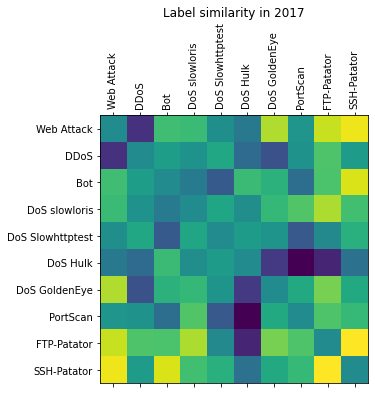

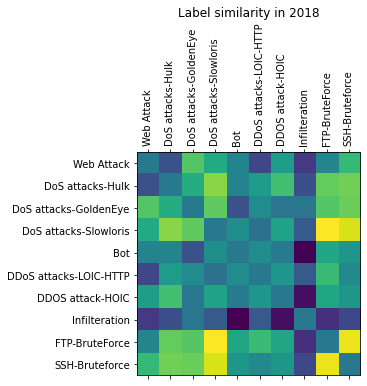

In [14]:
plt.matshow(sim17)
plt.title("Label similarity in 2017")
plt.xticks(range(10),lab_name17, rotation=90)
plt.yticks(range(10),lab_name17)
plt.show()
plt.matshow(sim18)
plt.title("Label similarity in 2018")
plt.xticks(range(10),lab_name18, rotation=90)
plt.yticks(range(10),lab_name18)
plt.show()

# performances

In [15]:
print("test acc for 17 binary classification", \
      test_model(clf_bn17, test_bnloader17, criterion_bn, device, 100.0, binary=True)[1])
print("test acc for 18 binary classification",\
      test_model(clf_bn18, test_bnloader18, criterion_bn, device, 100.0, binary=True)[1])

test acc for 17 binary classification tensor(99.2741)
test acc for 18 binary classification tensor(98.9970)


In [16]:
print("test acc for 17<-18 binary classification", \
     test_model(clf_bn17, ooc_bnloader18, criterion_bn, device, 100.0, binary=True)[1])
print("test acc for 18<-17 binary classification",\
      test_model(clf_bn18, ooc_bnloader17, criterion_bn, device, 100.0, binary=True)[1])

test acc for 17<-18 binary classification tensor(88.5671)
test acc for 18<-17 binary classification tensor(73.7206)


In [33]:
preds1718 = (get_prediction(clf_bn17, ooc_bnloader18, device)>0.5).long()
preds1817 = (get_prediction(clf_bn18, ooc_bnloader17, device)>0.5).long()

In [32]:
# cicids17_bn[3].to_numpy().flatten()
get_prediction(clf_bn18, ooc_bnloader17, device)

tensor([[4.2838e-03],
        [2.3516e-06],
        [3.6638e-01],
        ...,
        [1.5248e-06],
        [1.0459e-05],
        [9.2961e-02]])

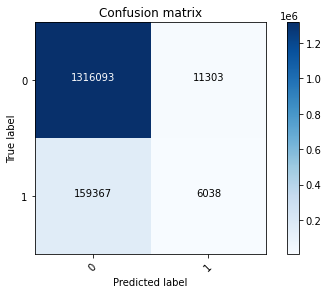

In [34]:
from sklearn.metrics import confusion_matrix
cm1718 = confusion_matrix(cicids18_bn[3].to_numpy().flatten(), preds1718.flatten())
cm1817 =confusion_matrix(cicids17_bn[3].to_numpy().flatten(), preds1817.flatten())
plot_confusion_matrix(cm1718,classes = range(2), normalize=False)
# plot_confusion_matrix(cm1718,classes = range(2), normalize=True)

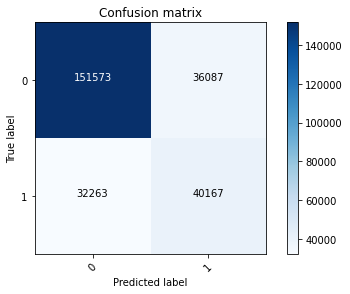

In [35]:
plot_confusion_matrix(cm1817,classes = range(2))

In [36]:
print("test acc for 17 attack classification", \
       test_model(clf_mul17, test_mulloader17, criterion_mul, device, 100.0, binary=False))
print("test acc for 18 attack classification",\
       test_model(clf_mul18, test_mulloader18, criterion_mul, device, 100.0, binary=False))

test acc for 17 attack classification (tensor(0.0055), tensor(99.8882), tensor(0.1901))
test acc for 18 attack classification (tensor(0.0021), tensor(99.9728), tensor(0.0938))


/home/saerom/.pyenv/versions/osrnn/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/saerom/.pyenv/versions/osrnn/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


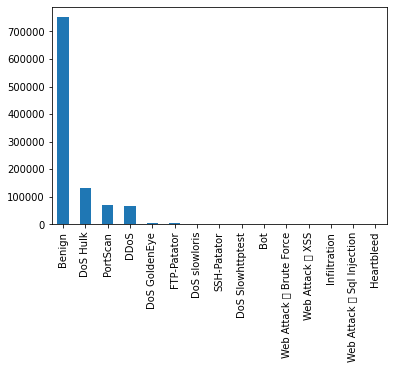

In [19]:
import matplotlib.pyplot as plt
ax17 = df_tr17['Label'].value_counts().plot(kind='bar')

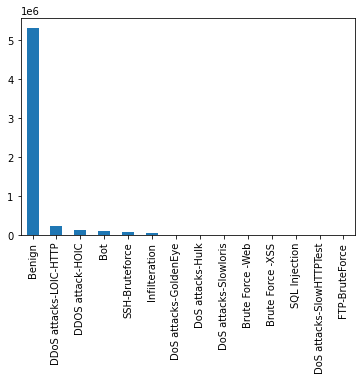

In [20]:
ax18 = df_tr18['Label'].value_counts().plot(kind='bar')

In [21]:
print(lab_name17)
print(lab_name18)

['Web Attack', 'DDoS', 'Bot', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'PortScan', 'FTP-Patator', 'SSH-Patator']
['Web Attack', 'DoS attacks-Hulk', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris', 'Bot', 'DDoS attacks-LOIC-HTTP', 'DDOS attack-HOIC', 'Infilteration', 'FTP-BruteForce', 'SSH-Bruteforce']


In [38]:
lab_728 = {0:0, 2:4, 3:3, 5:1, 6:2, 8:8, 9:9} #1: DDoS, 4: DoS Slowhttptest, 7: PortScan
lab_827 = {0:0, 1:5, 2:6, 3:3, 4:2, 8:8, 9:9} # 5: DDoS attacks-LOIC-HTTP, 6: DDOS attack-HOIC,  7: Infilteration

# test across datasets

## 18 -> 17

In [47]:
def test_torch_accross_dataset(datadfs, clf, scaler, lab_map, lab_name_src, lab_name_tg,device,batch_size = 256):    
    for lab in lab_map:
        ooc_col = lab # dataset label
        true_col = lab_map[lab] # clf label
        ooc_idx = datadfs[1]==ooc_col
        train_ooc = datadfs[0][ooc_idx]
        print("OOC Label: ", lab_name_src[ooc_col], "/ True Label: ", lab_name_tg[true_col])
        data_loader = make_dataloader(train_ooc,np.zeros(train_ooc.shape[0]), batch_size=batch_size, 
                                      shuffle=False, scaler=scaler)
        pred = torch.softmax(get_prediction(clf, data_loader, device),dim=1)
        pred_m = torch.argmax(pred, dim=1).detach().numpy()
        pred_ht,_ = np.histogram(pred_m, range=[0,10])        
        plt.bar(np.arange(10),pred_ht)
        plt.title("accuracy: "+str(float(sum(pred_m ==true_col)/len(pred_m))))
        plt.xticks(np.arange(10),lab_name_tg,rotation=90)
        plt.show()
        
        plt.hist(torch.max(pred, dim=1).values.detach().numpy())
        plt.title("maximum probability")
        plt.show()
        

OOC Label:  Web Attack / True Label:  Web Attack


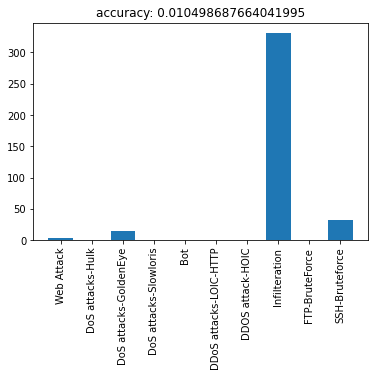

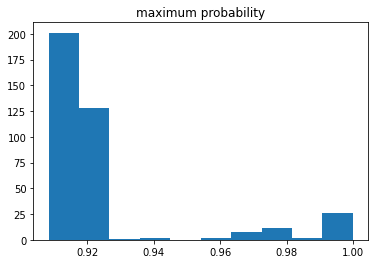

OOC Label:  Bot / True Label:  Bot


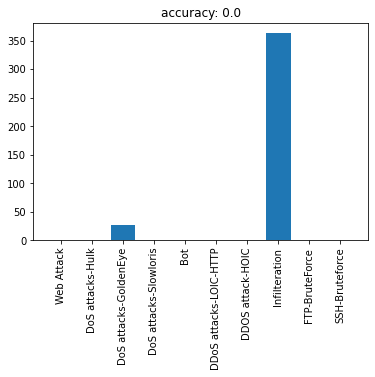

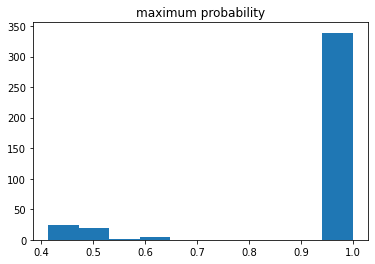

OOC Label:  DoS slowloris / True Label:  DoS attacks-Slowloris


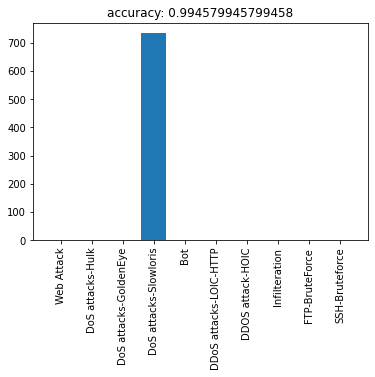

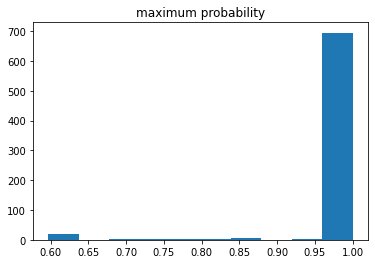

OOC Label:  DoS Hulk / True Label:  DoS attacks-Hulk


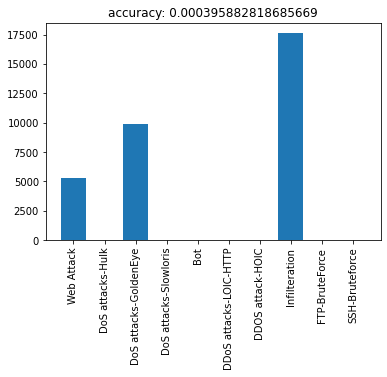

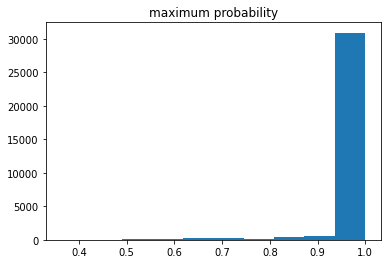

OOC Label:  DoS GoldenEye / True Label:  DoS attacks-GoldenEye


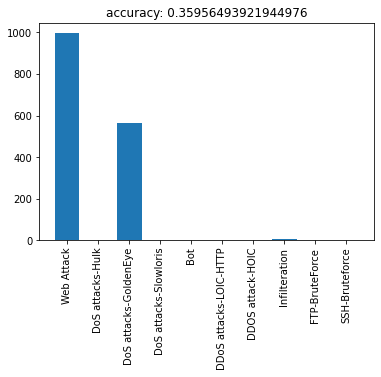

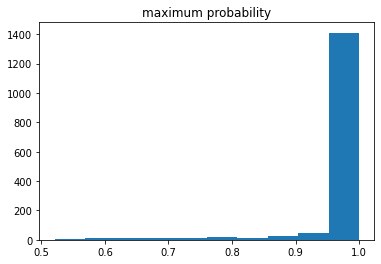

OOC Label:  FTP-Patator / True Label:  FTP-BruteForce


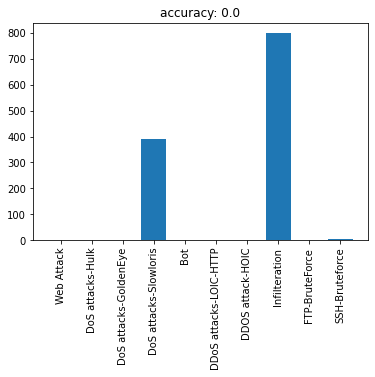

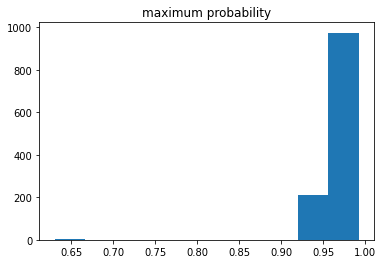

OOC Label:  SSH-Patator / True Label:  SSH-Bruteforce


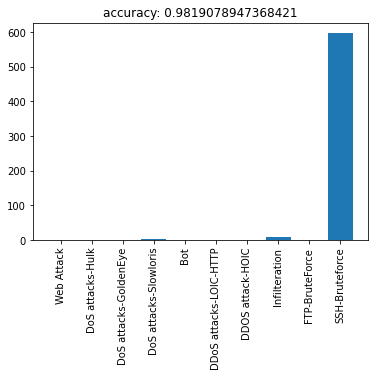

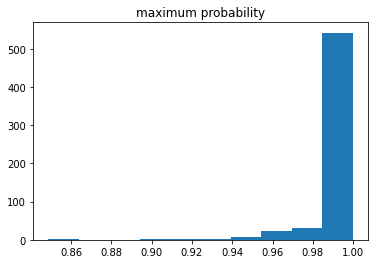

In [48]:
test_torch_accross_dataset(cicids17_m[2:4], clf_mul18,cicids18_m[4], lab_728, lab_name17, lab_name18, device)

OOC Label:  Web Attack / True Label:  Web Attack


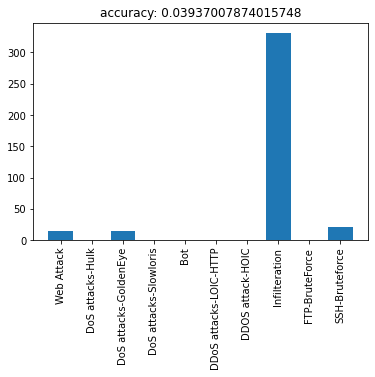

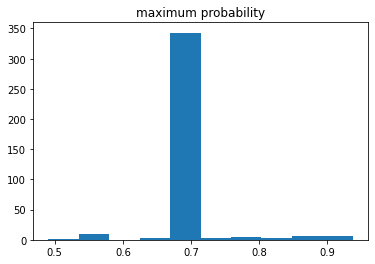

OOC Label:  Bot / True Label:  Bot


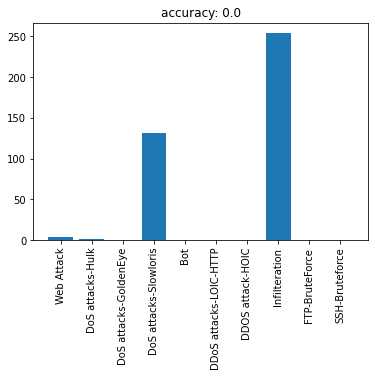

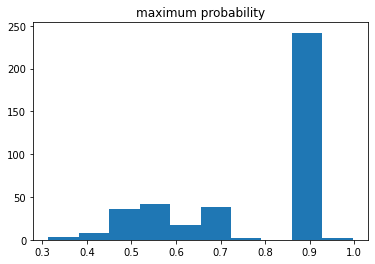

OOC Label:  DoS slowloris / True Label:  DoS attacks-Slowloris


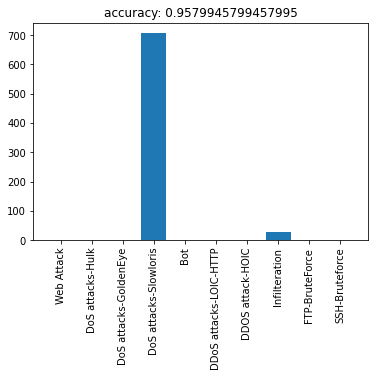

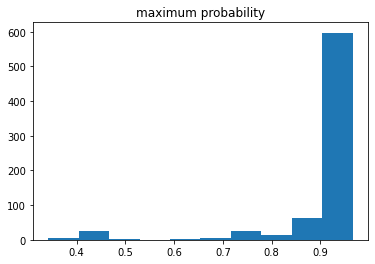

OOC Label:  DoS Hulk / True Label:  DoS attacks-Hulk


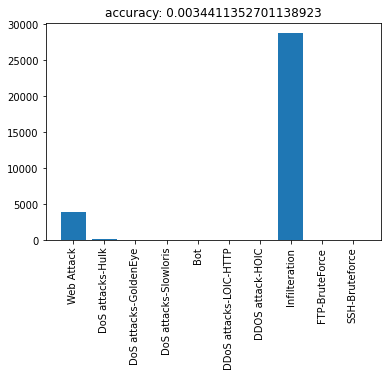

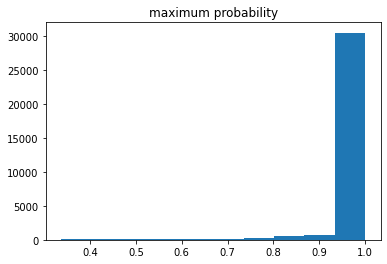

OOC Label:  DoS GoldenEye / True Label:  DoS attacks-GoldenEye


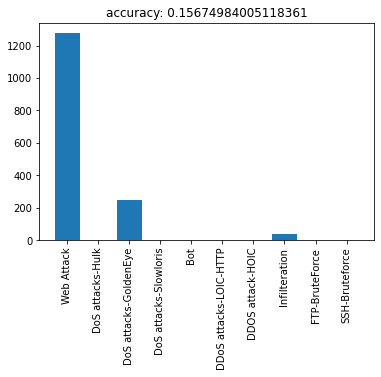

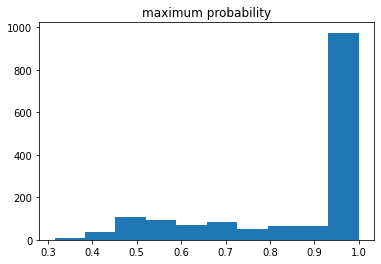

OOC Label:  FTP-Patator / True Label:  FTP-BruteForce


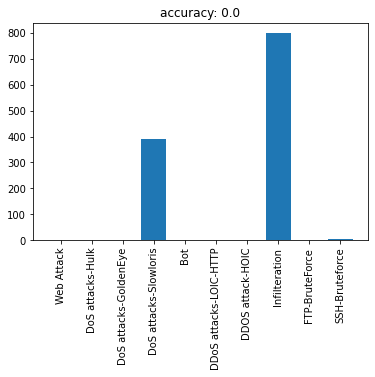

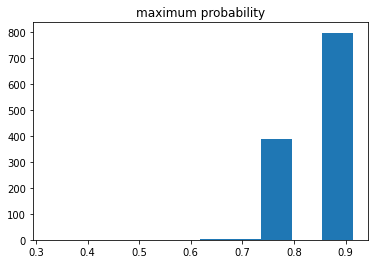

OOC Label:  SSH-Patator / True Label:  SSH-Bruteforce


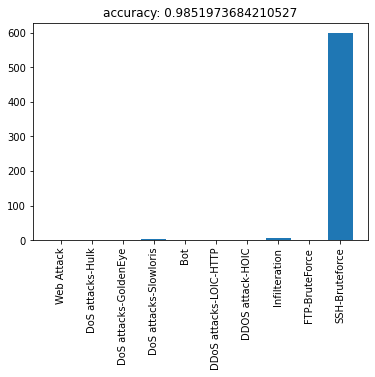

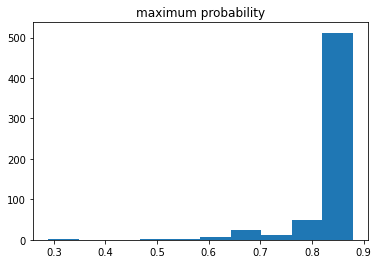

In [49]:
test_torch_accross_dataset(cicids17_m[2:4], clf_mul18_LS,cicids18_m[4], lab_728, lab_name17, lab_name18, device)

OOC Label:  Web Attack / True Label:  Web Attack


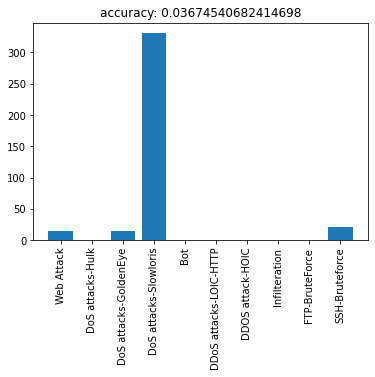

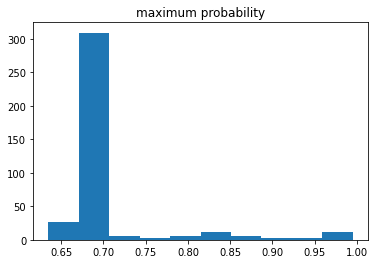

OOC Label:  Bot / True Label:  Bot


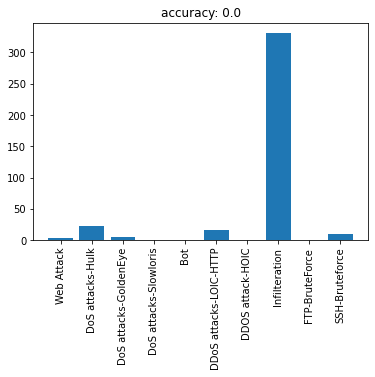

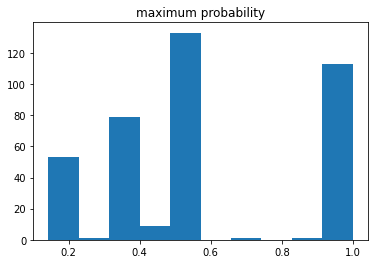

OOC Label:  DoS slowloris / True Label:  DoS attacks-Slowloris


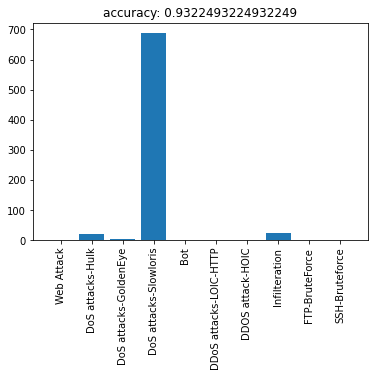

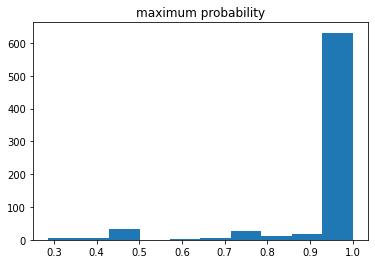

OOC Label:  DoS Hulk / True Label:  DoS attacks-Hulk


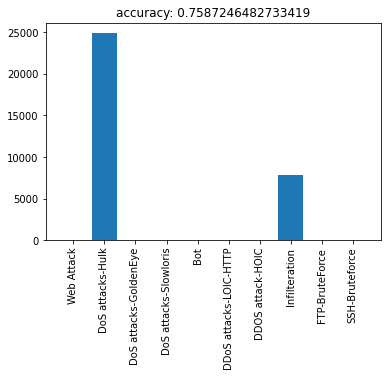

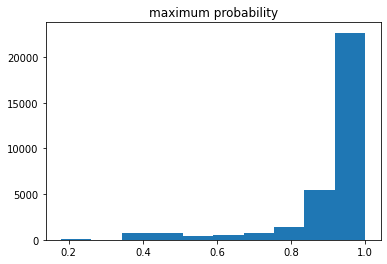

OOC Label:  DoS GoldenEye / True Label:  DoS attacks-GoldenEye


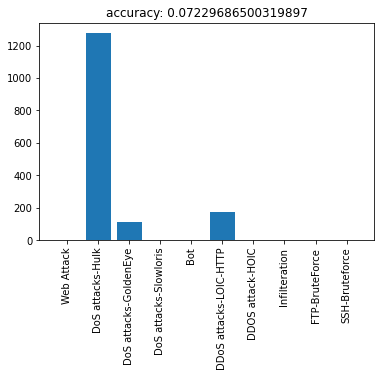

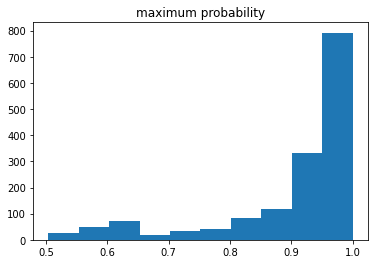

OOC Label:  FTP-Patator / True Label:  FTP-BruteForce


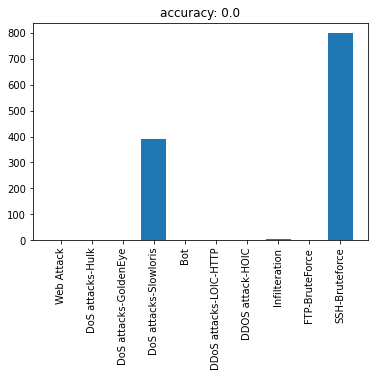

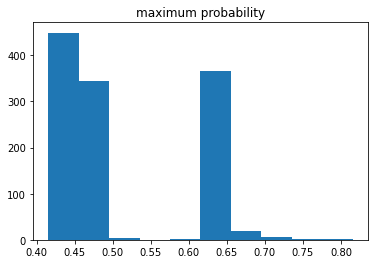

OOC Label:  SSH-Patator / True Label:  SSH-Bruteforce


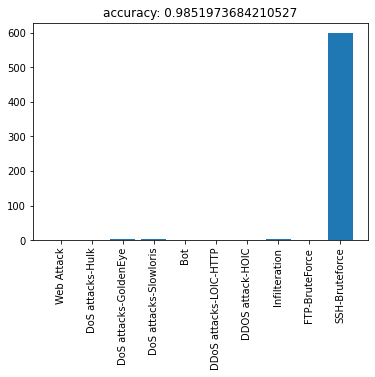

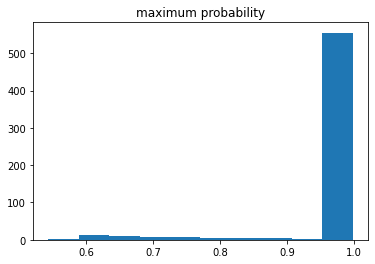

In [50]:
test_torch_accross_dataset(cicids17_m[2:4], clf_mul18_OE,cicids18_m[4], lab_728, lab_name17, lab_name18, device)

apply 18 to 17
OOC Label:  Web Attack / True Label:  Web Attack
11/11 [==============================] - 0s 1ms/step


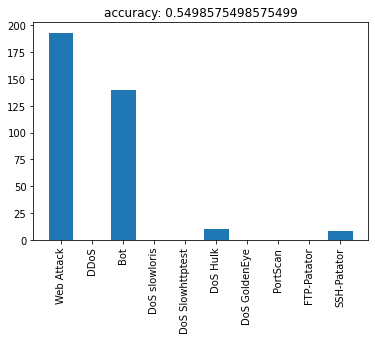

OOC Label:  DoS attacks-Hulk / True Label:  DoS Hulk
642/642 [==============================] - 1s 2ms/step


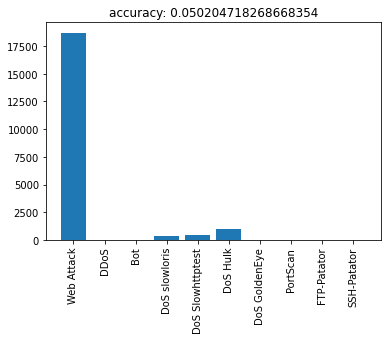

OOC Label:  DoS attacks-GoldenEye / True Label:  DoS GoldenEye
694/694 [==============================] - 1s 992us/step


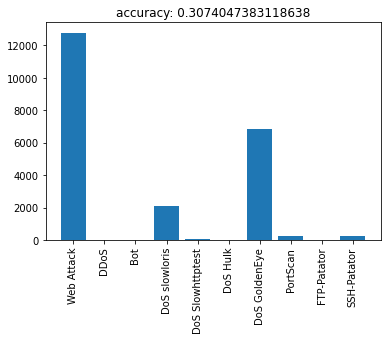

OOC Label:  DoS attacks-Slowloris / True Label:  DoS slowloris
191/191 [==============================] - 0s 1ms/step


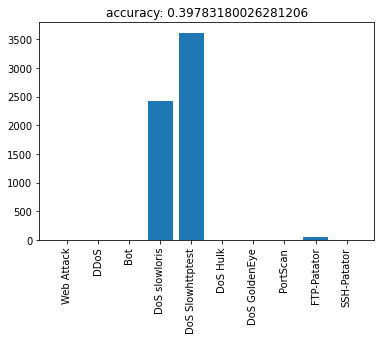

OOC Label:  Bot / True Label:  Bot
3570/3570 [==============================] - 9s 3ms/step


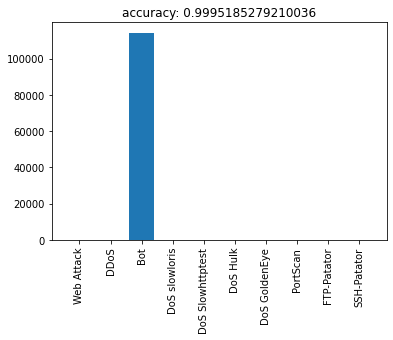

OOC Label:  FTP-BruteForce / True Label:  FTP-Patator
1/1 [==============================] - 0s 22ms/step


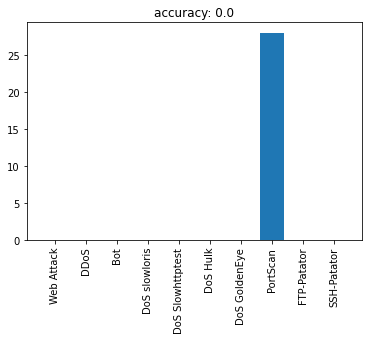

OOC Label:  SSH-Bruteforce / True Label:  SSH-Patator
2349/2349 [==============================] - 6s 3ms/step


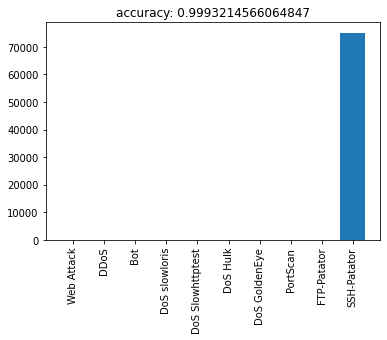

In [36]:
print("apply 18 to 17")
test_nn_accross_dataset(train_mul18, clf_mul17, st_scaler_m17, lab_827, lab_name18, lab_name17)

apply 17 to 18
OOC Label:  Web Attack / True Label:  Web Attack
55/55 [==============================] - 0s 3ms/step


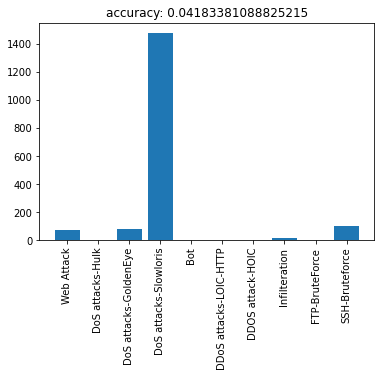

OOC Label:  Bot / True Label:  Bot
49/49 [==============================] - 0s 3ms/step


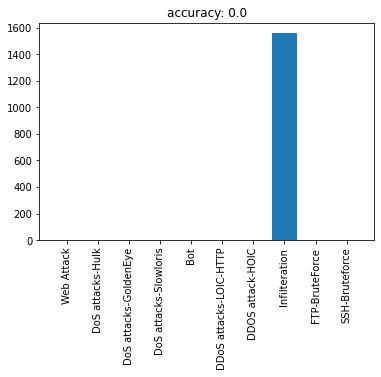

OOC Label:  DoS slowloris / True Label:  DoS attacks-Slowloris
94/94 [==============================] - 0s 2ms/step


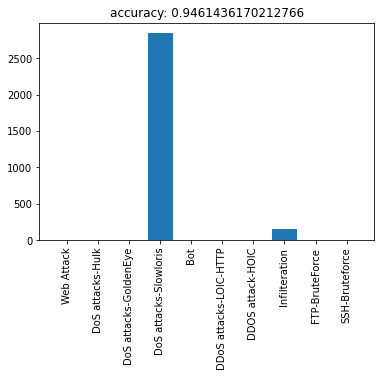

OOC Label:  DoS Hulk / True Label:  DoS attacks-Hulk
4082/4082 [==============================] - 7s 2ms/step


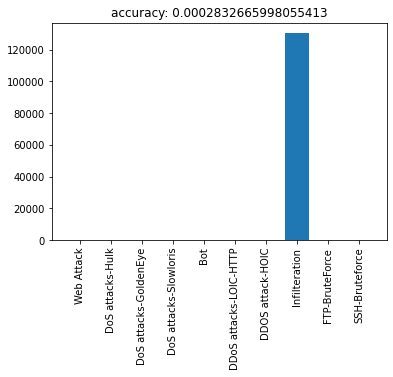

OOC Label:  DoS GoldenEye / True Label:  DoS attacks-GoldenEye
193/193 [==============================] - 0s 2ms/step


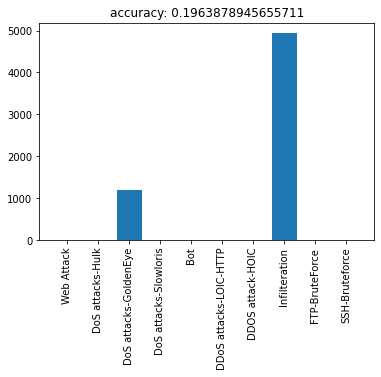

OOC Label:  FTP-Patator / True Label:  FTP-BruteForce
146/146 [==============================] - 0s 979us/step


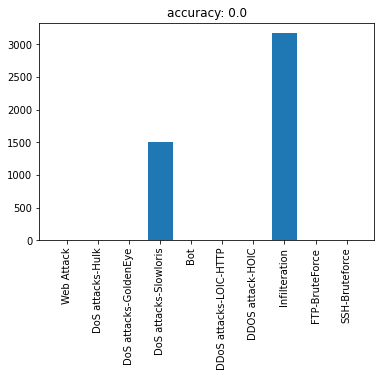

OOC Label:  SSH-Patator / True Label:  SSH-Bruteforce
82/82 [==============================] - 0s 932us/step


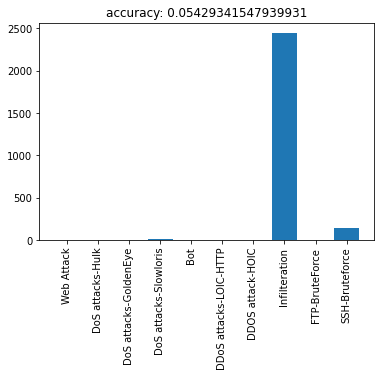

In [37]:
print("apply 17 to 18")
test_nn_accross_dataset(train_mul17, clf_mul18, st_scaler_m18, lab_728, lab_name17, lab_name18)

In [28]:
ooc_col = 9 # 
true_col = 9 # 
ooc_idx = (train_mul18['Label']==ooc_col)
train_ooc = train_mul18.loc[ooc_idx]
train_ooc = train_ooc.loc[:,train_ooc.columns!='Label']

In [29]:
import collections
ct = collections.Counter(train_ooc['Destination Port'].values)

In [30]:
train_ooc.shape

(75161, 67)

In [31]:
pred = apply_clf_with_scaler(lr_clfm17,st_scaler_m17, train_ooc)

In [32]:
sum(pred ==true_col)/len(pred)

0.9995476377376565

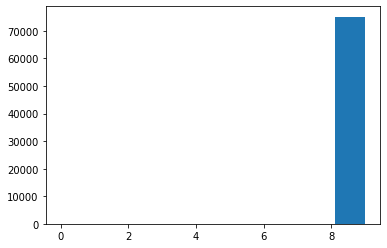

In [33]:
import matplotlib.pyplot as plt
plt.hist(pred)
plt.show()